<font size=7>Animate Seizure Event

# Setup

Here we check to see if there are any interesting patterns during the seizure event.

In [7]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves
from human_hip.spike_data import read_autocurated_data, plot_raster
from human_hip.animate import animate_firing_rate


In [3]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [4]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

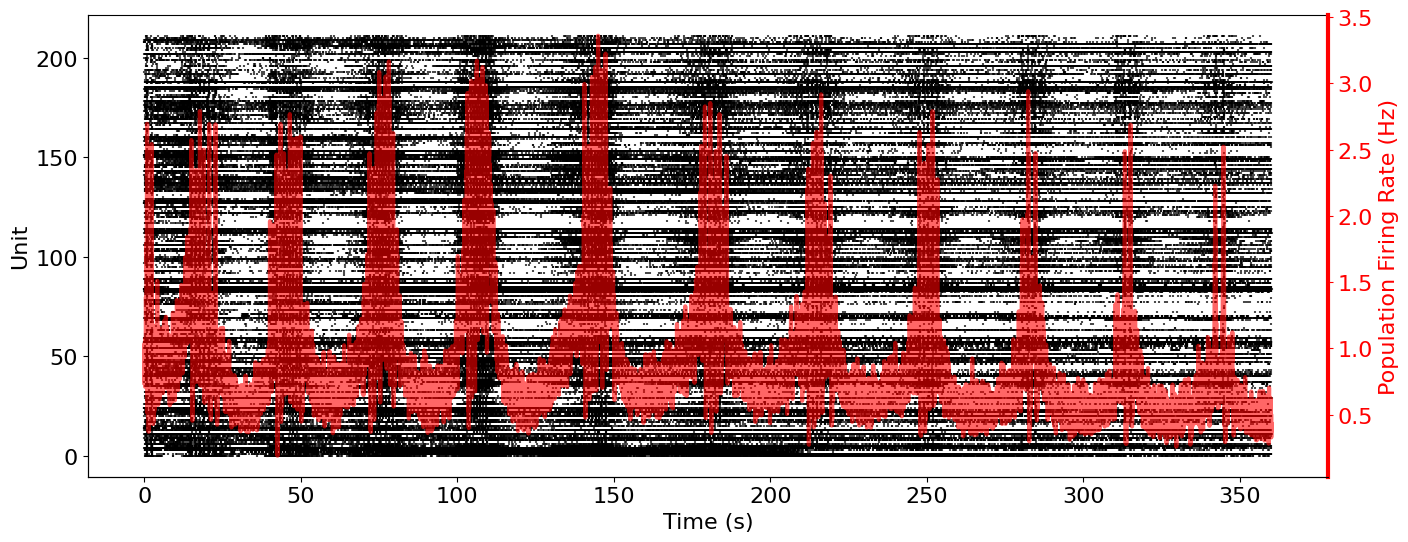

In [5]:
plot_raster( sd )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

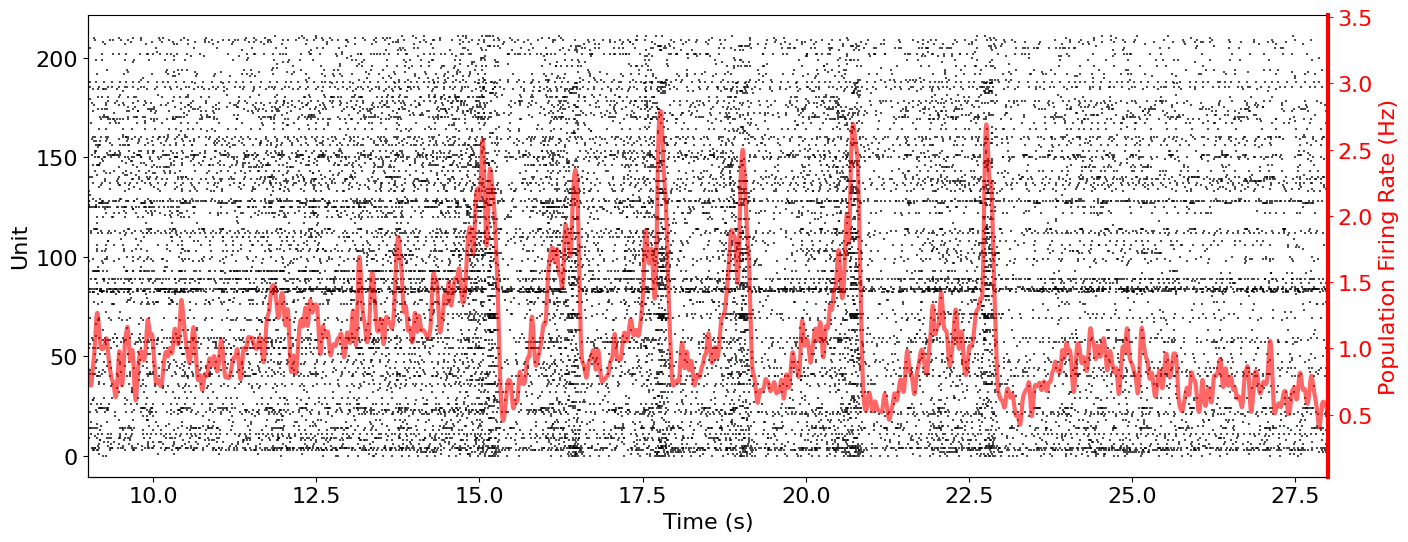

In [6]:
plot_raster( sd , xlim=(9, 28))

# Firing Rate

In [8]:
animate_firing_rate

<function human_hip.animate.animate_firing_rate.animate_firing_rate(sd, movie_range_ms=None, frame_interval_ms=100, filename='firing_rate.mp4', size_exp=1.4, size_scale=3)>

Making animation of 0.333 minutes
Saved animation to media/firing_rate.mp4


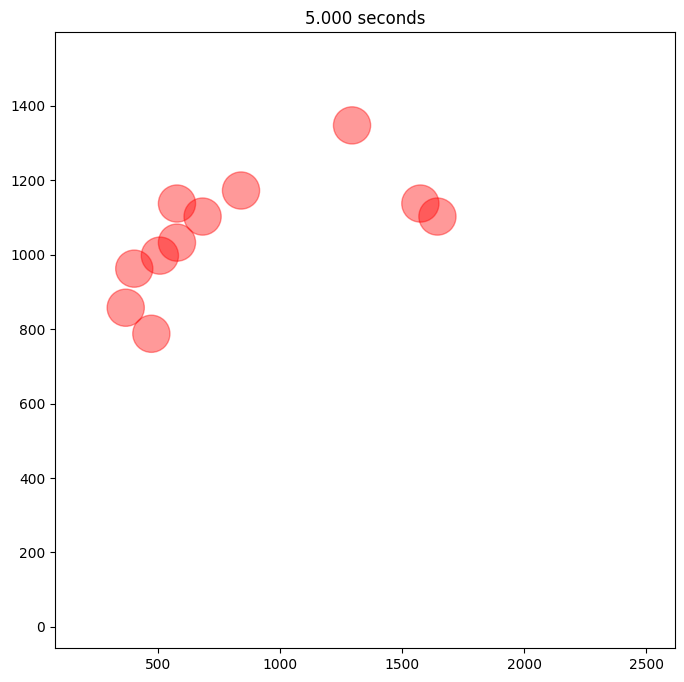

In [10]:
animate_firing_rate(sd, movie_range_ms=range(5000,9000,20), filename='media/firing_rate.mp4'  )

# <font color="brown"> Multiplot - Spike Raster

In [60]:
size_exp = 1.4
size_scale = 3
movie_range_ms = range(14000, 15500,5)
filename = "firing_rate.mp4"
frame_interval_ms= 300

In [61]:
from human_hip.spike_data import firing_rates

In [62]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from human_hip.spike_data import firing_rates
import numpy as np
from scipy.ndimage import gaussian_filter1d


Making animation of 1.5 minutes


/tmp/ipykernel_16100/2936335132.py:10: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


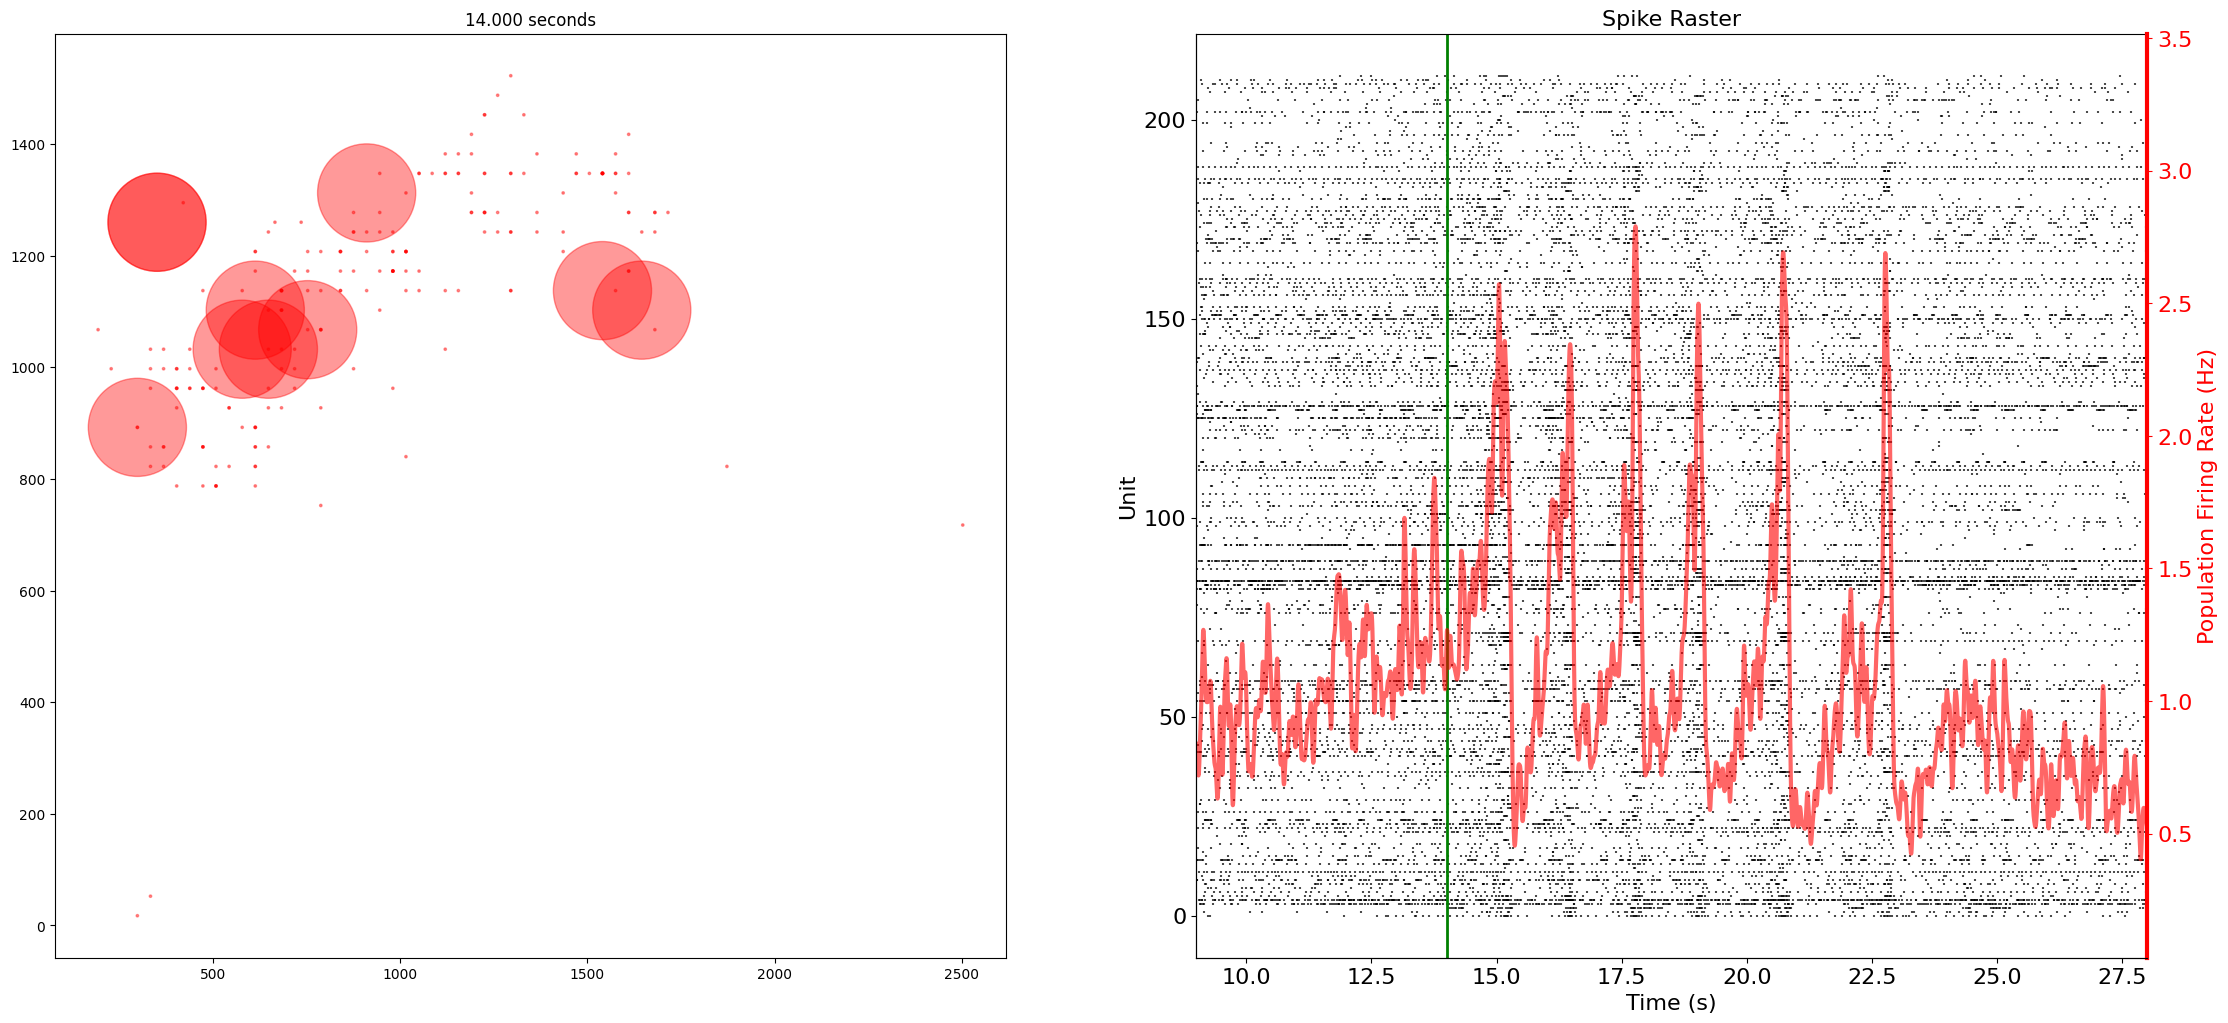

In [63]:
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))

# creat movie range
movie_range_ms = range(0, int(sd.length), 1000) if movie_range_ms is None else movie_range_ms
video_length = round( len(movie_range_ms)*frame_interval_ms/1000/60 ,3)
print(f"Making animation of {video_length} minutes")

# get neuron positions and create firing rate plot
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)
plot0 = plots[0].scatter( neuron_xy[:,0], neuron_xy[:,1], s=(firing_rates(sd)**size_exp)*size_scale, alpha=.4,  c='red' )

### Code for Raster ###
# Get firing rate
pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plots[1].set_title("Spike Raster", fontsize=16)

y = 0
for vv in sd.train:
    plots[1].scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
    y += 1
plots[1].set_xlabel("Time (s)", fontsize=16)
plots[1].set_ylabel("Unit", fontsize=16)
plots[1].xaxis.set_tick_params(labelsize=16)
plots[1].yaxis.set_tick_params(labelsize=16)

axs1 = plots[1].twinx()
axs1.yaxis.set_label_position("right") 
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (ms)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.set_xlim((9, 28))
#axs1.set_ylim(ylim)
axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.tick_params(axis='y', colors='r')
vl = plots[1].axvline(x=10, color='green', linewidth=2, linestyle='-')
 

# animation function.  This is called sequentially
def animate(i):
    # firing rate
    sd_small = sd.subtime( i, i+movie_range_ms.step )
    firings = firing_rates(sd_small)
    firings[ firings==0 ] = 1
    plot0._sizes = (firings**size_exp) * size_scale
    plots[0].set_title(f"{i/1000:.3f} seconds")
    # Raster Plot
    t = i/1000
    vl.set_xdata([t,t])
    return plots

anim = FuncAnimation(fig, animate, frames=movie_range_ms, interval=frame_interval_ms, blit=False)  
anim.save( filename )

# <font color="brown">Multiplot raw waves

In [78]:
size_exp = 1
size_scale = 1
movie_range_ms = range(5000,7000,5)
filename = "firing_rate.mp4"
frame_interval_ms= 300
theta_size_exp=1.9
theta_size_scale=90

In [79]:
wave_type = "theta"

In [80]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves
from human_hip.animate import animate_waves
from human_hip.spike_data import read_autocurated_data, plot_raster
from matplotlib import cm

In [81]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
raw_dict = data_raw
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


/tmp/ipykernel_16100/3286305141.py:11: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


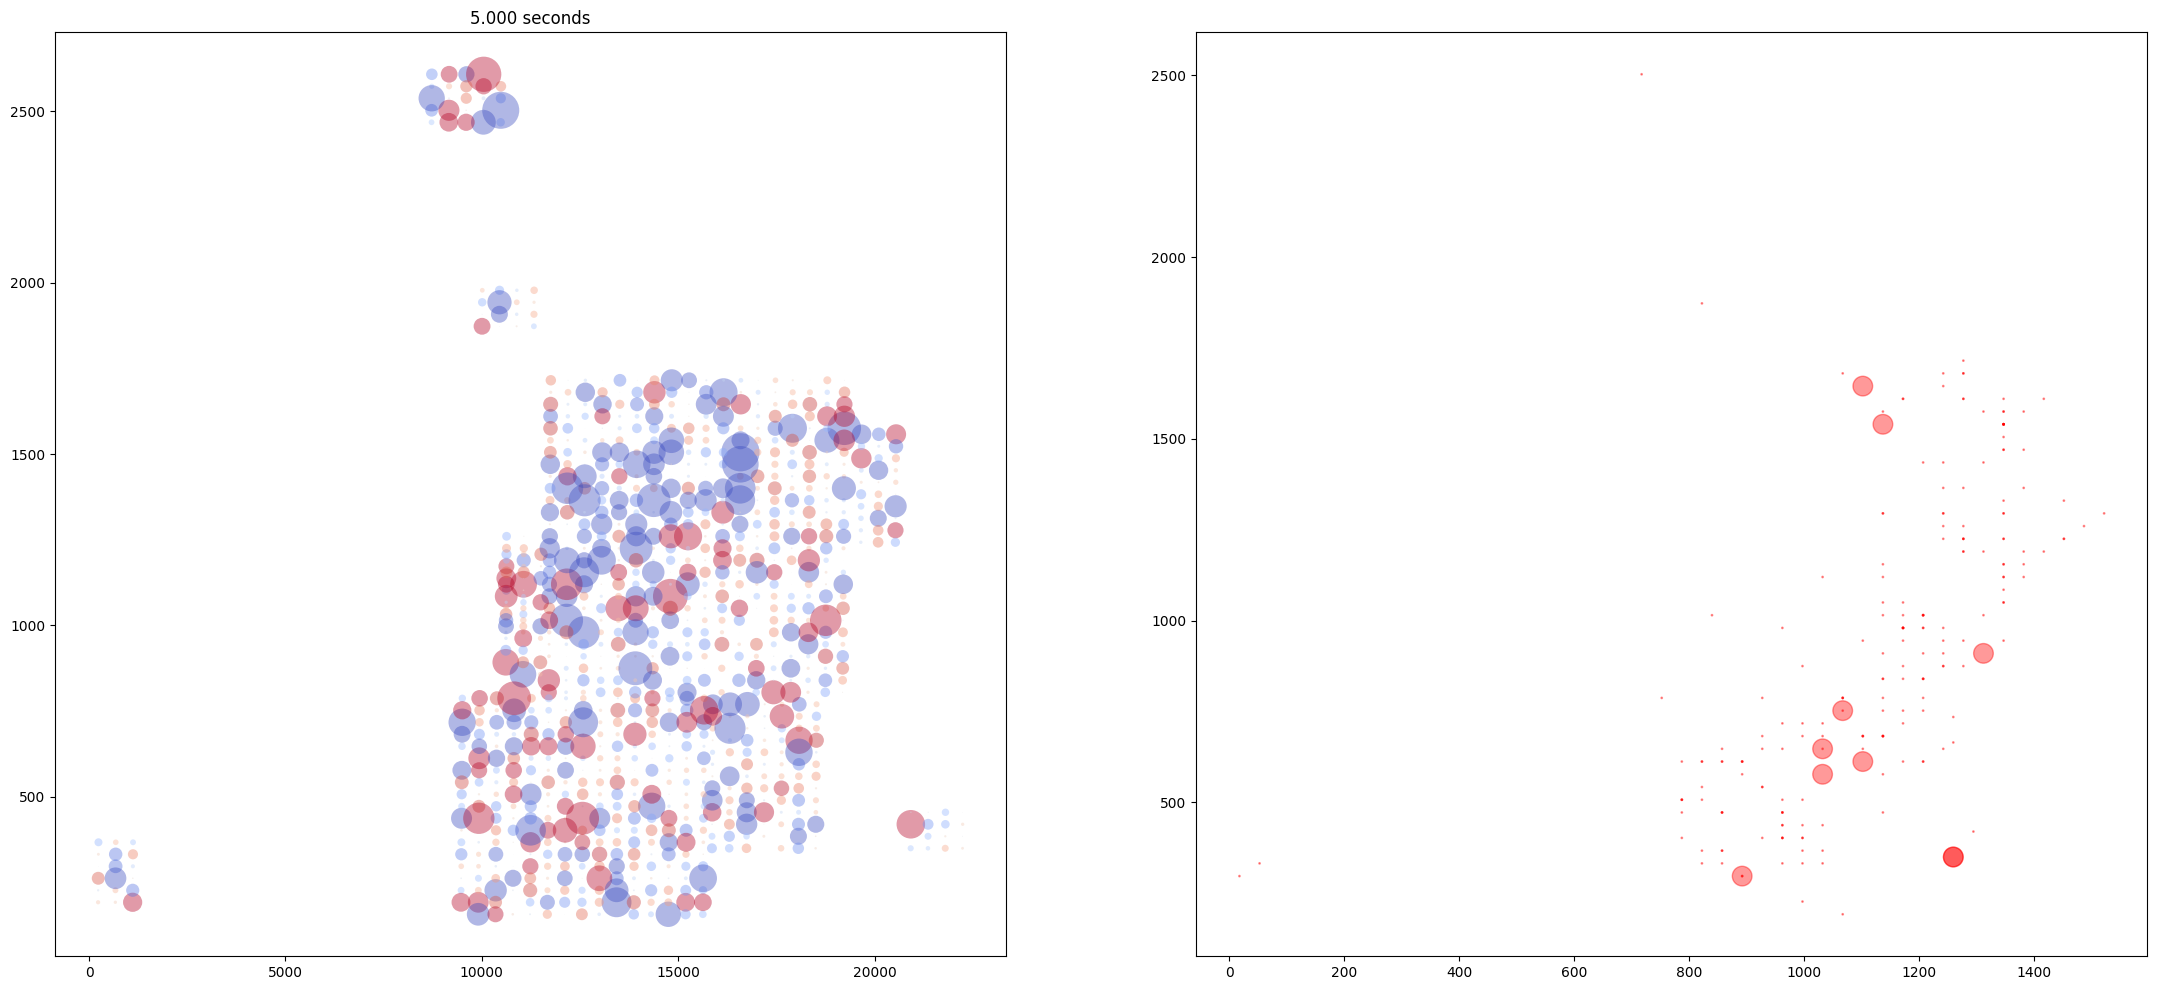

In [85]:
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))

### Code for Theta Plot ###
data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )[wave_type]  # get common brain waves
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
plot0 = plots[0].scatter( raw_dict['xy'][:,0], raw_dict['xy'][:,1], c=data[:,0] , norm=norm, cmap=cm.coolwarm,
                        s=(np.abs(data[:,0])**theta_size_exp)*theta_size_scale ,  alpha=.4 , edgecolor='none' )

### Code for firing rates###
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)
plot1 = plots[1].scatter( neuron_xy[:,1], neuron_xy[:,0], s=(firing_rates(sd)**size_exp)*size_scale, alpha=.4,  c='red' )


# animation function.  This is called sequentially
def animate(i):
    # Wave plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**theta_size_exp)*theta_size_scale
    plots[0].set_title(f"{i/1000:.3f} seconds")
    # firing rate
    sd_small = sd.subtime( 9000+i, 9000+i+movie_range_ms.step )
    firings = firing_rates(sd_small)
    firings[ firings==0 ] = 1
    plot1._sizes = (firings**size_exp) * size_scale
    #plots[0].set_title(f"{i/1000:.3f} seconds")

anim = FuncAnimation(fig, animate, frames=movie_range_ms, interval=frame_interval_ms, blit=False)  
anim.save( 'theta_firing_rates.mp4' )

# <font color="red"> multiplot - NOT DONE

This attempt only consider if/not a neuron fires, not firing rate

In [22]:
import numpy as np

In [27]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from human_hip.spike_data import firing_rates
import numpy as np


In [26]:
from scipy.ndimage import gaussian_filter1d

In [21]:
start_time = 5000 + 9 * 1000  # start_time is 5000ms into the raw recording which is 9 seconds from the start of the spike recording
end_time = 9000 + 9 * 1000

# make smaller spike train of only spikes in time window
small_train = []
for i_train in sd.train:
    small_train.append( i_train[ (i_train > start_time) & (i_train < end_time) ] )

In [23]:
neurons_by_time = []
for i in range(start_time, end_time):                                   # loop over time
    firing_neurons = []
    for i2 in range(len(small_train)):                                   # loop over neurons
        if len(small_train[i2]) > 0:                                     # if neuron fires at all
            if np.sum( np.abs( small_train[i2] - i ) < 25 ):             # if neuron fires within at least once within 50 ms of time i
                #neuron_x.append( sd.neuron_data[0][i2]['position'][0] )  # add neuron x/y locations to list
                #neuron_y.append( sd.neuron_data[0][i2]['position'][1] )
                firing_neurons.append( i2 )
    neurons_by_time.append( firing_neurons )

In [28]:
movie_range_ms = range(5000,9000,20)
filename = "firing_rate.mp4"
frame_interval_ms= 100
start_s = 9

In [ ]:
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))

# creat movie range
movie_range_ms = range(0, int(sd.length), 1000) if movie_range_ms is None else movie_range_ms
video_length = round( len(movie_range_ms)*frame_interval_ms/1000/60 ,3)
print(f"Making animation of {video_length} minutes")

# get neuron positions and create firing rate plot
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)
plot0 = plots[0].scatter( neuron_xy[:,0], neuron_xy[:,1], s=(firing_rates(sd)**size_exp)*size_scale, alpha=.4,  c='red' )

### Code for Raster ###
# Get firing rate
pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plots[1].set_title("Spike Raster", fontsize=16)

y = 0
for vv in sd.train:
    plots[1].scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
    y += 1
plots[1].set_xlabel("Time (s)", fontsize=16)
plots[1].set_ylabel("Unit", fontsize=16)
plots[1].xaxis.set_tick_params(labelsize=16)
plots[1].yaxis.set_tick_params(labelsize=16)

axs1 = plots[1].twinx()
axs1.yaxis.set_label_position("right") 
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (ms)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.set_xlim((9, 28))
#axs1.set_ylim(ylim)
axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.tick_params(axis='y', colors='r')
vl = plots[1].axvline(x=10, color='green', linewidth=2, linestyle='-')
 

# animation function.  This is called sequentially
def animate(i):
    # Wave plot
    sd_small = sd.subtime( i, i+movie_range_ms.step )
    plot0._sizes = (firing_rates(sd_small)**size_exp) * size_scale
    plots[0].set_title(f"{i/1000:.3f} seconds")
    # Raster Plot
    t = start_s + i/1000
    vl.set_xdata([t,t])
    return plots

anim = FuncAnimation(fig, animate, frames=movie_range_ms, interval=frame_interval_ms, blit=False)  
anim.save( filename )